In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Leitura da imagem a ser avaliada e redimensionamento para 20% do tamanho

Referência: https://acervolima.com/opencv-mistura-alfa-e-mascaramento-de-imagens/
https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html

**Leitura da imagem e da mascara**

In [ ]:
img = cv2.imread("/content/img.png") # Inserir caminho da imagem
mask = cv2.imread("/content/label.png", cv2.IMREAD_UNCHANGED) # Inserir caminho da mascara
# Tirar a cor vermelha da mascara lida e salvar
_, mask = cv2.threshold(mask[:, :, 2], 0, 255, cv2.THRESH_BINARY)
cv2.imwrite('mask.png', mask)
mask = cv2.imread("/content/mask.png") # Substituir caminho se necessário
# cv2_imshow(mask)

**Redimensionamento**

In [ ]:
height = 691
width = 1037
img = cv2.resize(img, (width, height))
mask = cv2.resize(mask, (width, height))

**Aplicação da mascara na imagem para selecionar região de interesse**

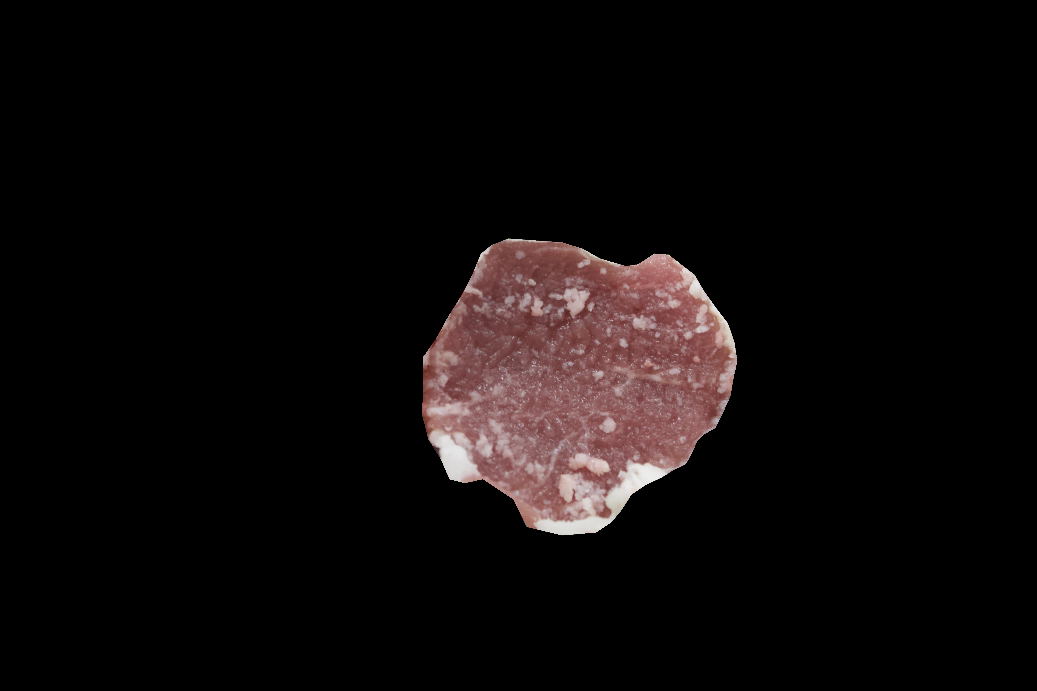

In [ ]:
img2 = cv2.bitwise_and(mask, img)
cv2_imshow(img2)

**Aplicação da escala de cinza**

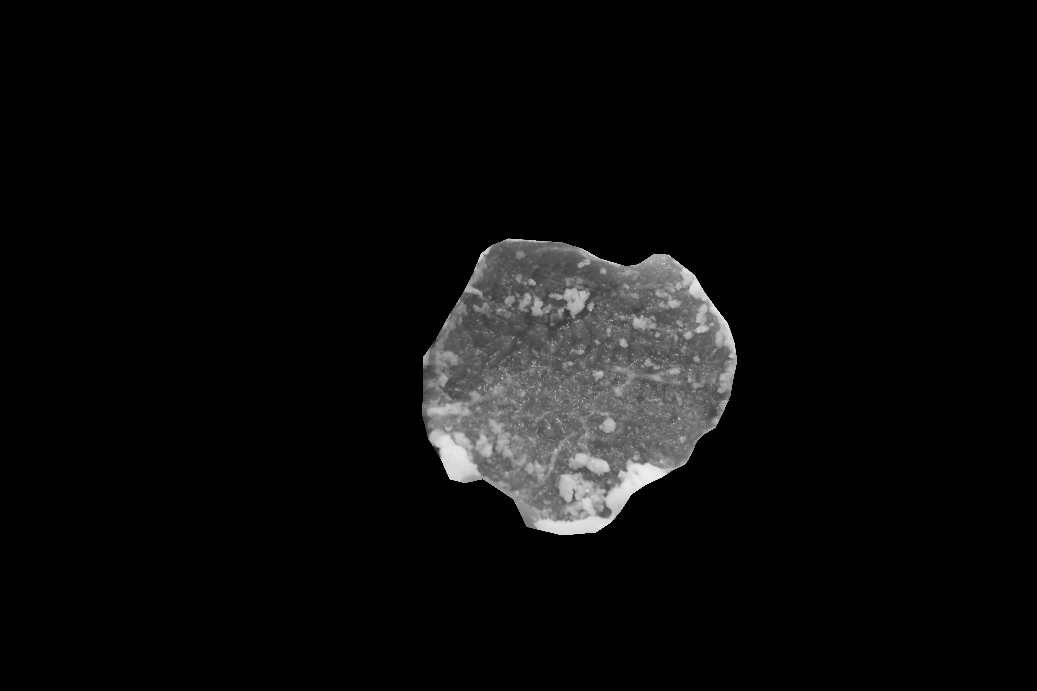

In [ ]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2_imshow(img2gray)

## Calculo do marmoreio com normalização

**Area em píxels da região de interesse**

In [ ]:
area_img2gray = (img2gray != 0).sum()
print('A área em pixels é de %i pixels.' % area_img2gray)

A área em pixels é de 68155 pixels.


**Normalizando a imagem em escala de cinza e extração do número de píxels com treshold >= 0.7**

In [ ]:
img2gray_norm = img2gray/255
px_marm = (img2gray_norm >= 0.7).sum()
print('O número de píxels com treshold >= 0.7 é %i píxels.' % px_marm)

O número de píxels com treshold >= 0.7 é 6571 píxels.


**Calculo do índice de marmoreio**

In [ ]:
marm = (px_marm/area_img2gray)*100
print('O índice de marmoreio da imagem é %f.' % marm)

O índice de marmoreio da imagem é 9.641259.


## Calculo do marmoreio sem normalização

In [ ]:
px_den = (img2gray != 0).sum()
print(px_den)

68155


In [ ]:
px_num = (img2gray >= 178).sum()
print(px_num)

6730


In [ ]:
marm = (px_num/px_den)*100
print(marm)

9.874550656591593


In [ ]:
# np.unique(img2gray[img2gray != 0])

## **Uma segunda maneira de calcular a área da região de interesse**

**Referência:** https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html

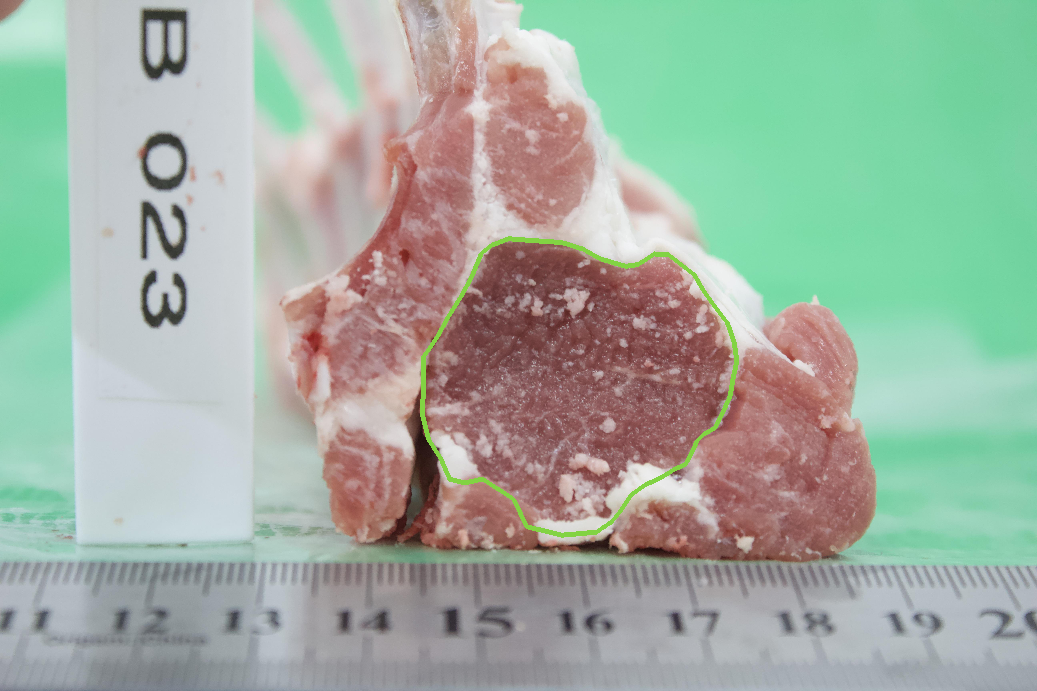

In [ ]:
from random import randint
contours, hierarchy = cv2.findContours(img2gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i, c in enumerate(contours): 
  img_cont = cv2.drawContours(img, contours, i, (randint(0,255),randint(0,255),randint(0,255)), 3)
cv2_imshow(img_cont)

In [ ]:
area = cv2.contourArea(contours[0])
print('A área em pixels é de %i pixels.' % area)

A área em pixels é de 67708 pixels.


**Calculando o marmoreio com este valor de área**

In [ ]:
px_num2 = (img2gray >= 178).sum()
marm = (px_num2/area)*100
print(marm)

9.939741241803036


## **Imagem com píxels de marmoreio**

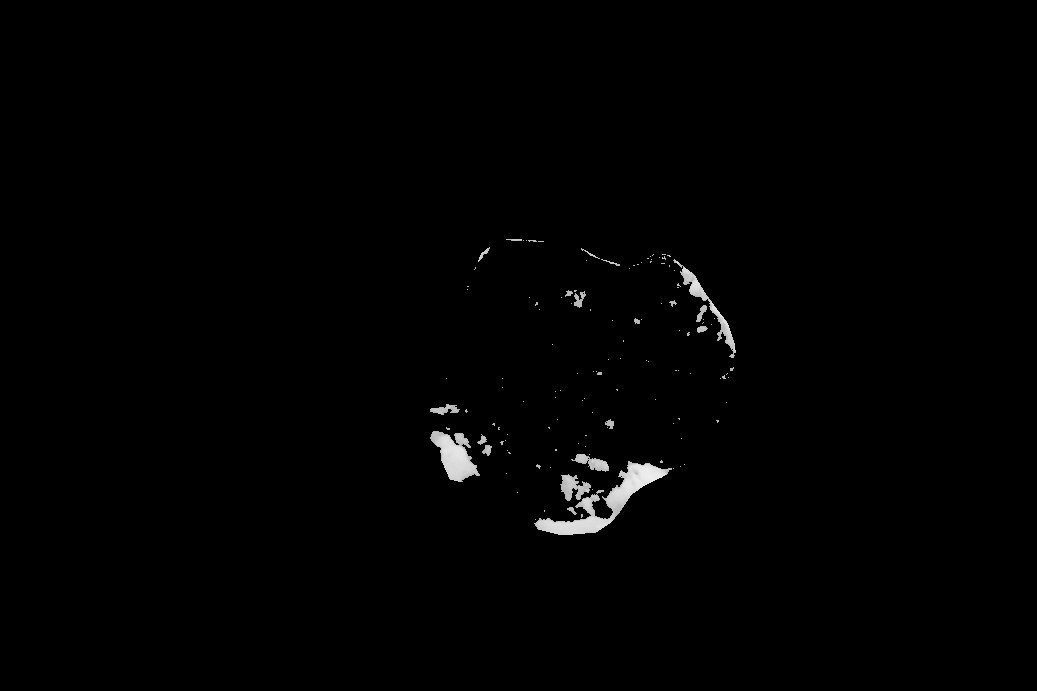

In [ ]:
marmimg = np.zeros((height, width)) 
for y in range(height):
  for x in range(width):
    if(img2gray.item(y, x) >= 178):
      marmimg.itemset((y, x), img2gray.item(y, x))
    else:
      marmimg.itemset((y, x), 0)

cv2_imshow(marmimg)

In [ ]:
from PIL import Image, ImageOps
marmimg2 = Image.fromarray(marmimg).convert('L')
marmimg2 = ImageOps.colorize(marmimg2, black ="black", white ="yellow")

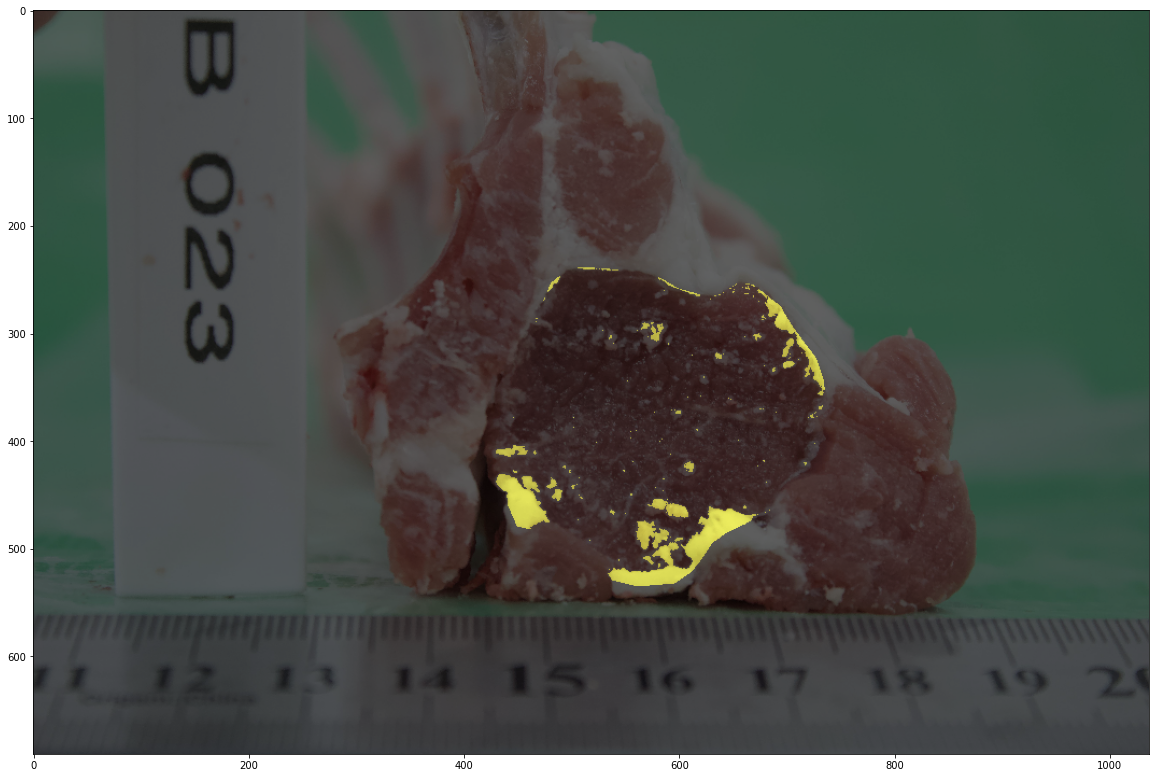

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread("/content/img.png")
img = cv2.resize(img, (width, height))
plt.figure(figsize = (20,20))
plt.imshow(img[:,:,::-1])
plt.imshow(marmimg2, alpha=0.6)